# Case Study

In [1]:
import numpy as np
import pandas as pd

import andes
import ams

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=30)
ams.config_logger(stream_level=30)

In [4]:
sp1 = ams.load('./../cases/IL200_opf_db.xlsx',
               setup=True, no_output=True,
               default_config=True)
sp2 = ams.load('./../cases/IL200_opf_db.xlsx',
               setup=True, no_output=True,
               default_config=True)

In [5]:
s1 = sp1.to_andes(addfile='./../cases/IL200_dyn_db.xlsx',
                   setup=False,
                   no_output=True,
                   default_config=True,)
s2 = sp2.to_andes(addfile='./../cases/IL200_dyn_db.xlsx',
                   setup=False,
                   no_output=True,
                   default_config=True,)
for ss in [s1, s2]:
    # add a Alter device to set load increase
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                           attr='v', method='+', amount=0.2))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_2', src='Ppf',
                           attr='v', method='+', amount=0.2))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_3', src='Ppf',
                           attr='v', method='+', amount=0.3))

    ss.setup()

Generating code for 1 models on 12 processes.


Following PFlow models in addfile will be overwritten: <Bus>, <PQ>, <PV>, <Slack>, <Shunt>, <Line>, <Area>
AMS system 0x127cc2db0 is linked to the ANDES system 0x174ada630.


Generating code for 1 models on 12 processes.


Following PFlow models in addfile will be overwritten: <Bus>, <PQ>, <PV>, <Slack>, <Shunt>, <Line>, <Area>
AMS system 0x175d32810 is linked to the ANDES system 0x1748c5520.


Adjust deadband settings

In [6]:
# --- TGOV1NDB ---
# dbL, Lower bound of deadband, p.u.
s1.TGOV1NDB.set(src='dbL', attr='v', idx=s1.TGOV1NDB.idx.v,
                value=0,  # TODO: set desired value
                )
# dbU, Upper bound of deadband, p.u.
s1.TGOV1NDB.set(src='dbU', attr='v', idx=s1.TGOV1NDB.idx.v,
                value=0,  # TODO: set desired value
                )

# --- Wind ---
# hard coded
wt_repca1 = [f'WT_REPCA1_{i+1}' for i in range(12)]
# Lower threshold for freq. error deadband, p.u. (Hz)
s1.REPCA1.set(src='fdbd1', attr='v',
              idx=wt_repca1,
              value=0.0)  # TODO: set desired value
# Upper threshold for freq. error deadband, p.u. (Hz)
s1.REPCA1.set(src='fdbd2', attr='v',
              idx=wt_repca1,
              value=0.0)  # TODO: set desired value

# --- PV ---
# hard coded
pv_repca1 = [f'PV_REPCA1_{i+1}' for i in range(10)]
# Lower threshold for freq. error deadband, p.u. (Hz)
s1.REPCA1.set(src='fdbd2', attr='v',
              idx=pv_repca1,
              value=0.0)  # TODO: set desired value
# Upper threshold for freq. error deadband, p.u. (Hz)
s1.REPCA1.set(src='fdbd2', attr='v',
              idx=pv_repca1,
              value=0.0)  # TODO: set desired value

# --- ESD1 ---
# frequency deviation deadband, Hz
s1.ESD1.set(src='fdbd', attr='v',
            idx=s1.ESD1.idx.v,
            value=-0.01)  # TODO: set desired value
# Gain after f deadband, pu (MW)/Hz
s1.ESD1.set(src='ddn', attr='v',
            idx=s1.ESD1.idx.v,
            value=0.0)  # TODO: set desired value

True

TODO: do samething for ``s2``

In [7]:
for ss in [s1, s2]:
    # Constant load
    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    ss.PFlow.run()

    _ = ss.TDS.init()

GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_7  | 0.865  | 1    
 GENROU_8  | 0      | 1    
 GENROU_9  | 0      | 1    
 GENROU_10 | 0      | 1    
 GENROU_11 | 0      | 1    
 GENROU_12 | 0      | 1    
 GENROU_13 | 0      | 1    
 GENROU_14 | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_26 | 0      | 1    
 GENROU_27 | 0      | 1    
 GENROU_28 | 0      | 1    
 GENROU_29 | 0      | 1    
 GENROU_30 | 0      | 1    
 GENROU_31 | 0      | 1    
 GENROU_32 | 0      | 1    
 GENROU_33 | 0      | 1    
 GENROU_34 | 0      | 1    
 GENROU_35 | 0      | 1    
 GENROU_36 | 0      | 1    
 GENROU_38 | 0.977  | 1    
 GENROU_46 | 0      | 1    


/Users/jinningwang/work/andes/andes/core/model/model.py:790: ComplexWarning: Casting complex values to real discards the imaginary part
  instance.v = np.array(func(*s

In [8]:
for ss in [s1, s2]:
    ss.TDS.config.tf = 50
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True

    ss.TDS.run()

<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.27385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.21695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.37947 at t=1. Previous value was 0.07947.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.27385 at t=1. Previous value was 0.07385.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.21695 at t=1. Previous value was 0.01695.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.37947 at t=1. Previous value was 0.07947.


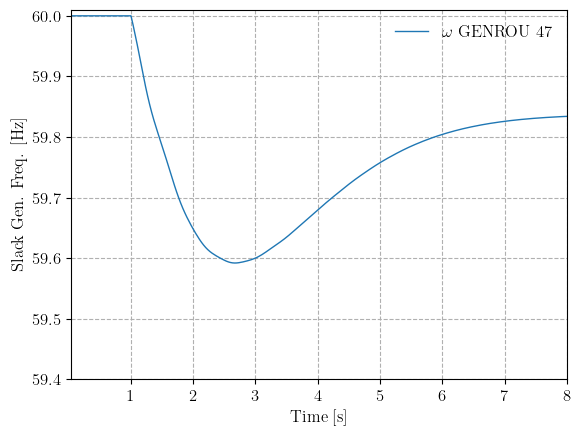

In [9]:

fmin, fmax = 59.4, 60.01
tmin, tmax = 0, 8
linewidth = 1.5
genrou_idx = 'GENROU_47'

# left: short-term response, without and with thermal inertia
_ = s1.TDS.plt.plot(
    s1.GENROU.omega,
    a=s1.GENROU.idx2uid(genrou_idx),
    left=tmin, right=tmax,
    ymin=fmin, ymax=fmax,
    ytimes=s1.config.freq,
    show=False, grid=True,
    ylabel='Slack Gen. Freq. [Hz]',
)